In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, f1_score, plot_confusion_matrix, \
    plot_roc_curve, plot_precision_recall_curve, classification_report, precision_score, recall_score

mpl.style.use('seaborn')

In [85]:
def show_report(model, model_name, X_val, y_val, pred_val):
    y_pred_proba = model.predict_proba(X_val)[:,1]

    df_report = pd.DataFrame(columns={'ROC-AUC'}, data=[0])
    df_report['ROC-AUC'] = roc_auc_score(y_val, y_pred_proba)
    df_report['F1'] = f1_score(y_val, pred_val)
    df_report['precision_0'] = precision_score(y_val, pred_val, pos_label=0)
    df_report['recall_0'] = recall_score(y_val, pred_val, pos_label=0)
    df_report['precision_1'] = precision_score(y_val, pred_val, pos_label=1)
    df_report['recall_1'] = recall_score(y_val, pred_val, pos_label=1)

    df_report.index = [model_name]
    return df_report

def score_graph(model, model_name, X_val, y_val, pred_val):
    # ROC curve 그리는 코드
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

    plot_precision_recall_curve(model, X_val, y_val, ax=ax1)
    plot_roc_curve(model, X_val, y_val, ax=ax2)
    plt.title(model_name)
    plt.show()

In [86]:
#### before

In [87]:
# X_bfr = pd.read_csv('../data/prepcd_scaled_train.csv')
# X_bfr.drop(columns='target', inplace=True)
# y_bfr = pd.read_csv('../data/prepcd_scaled_train.csv')['target']
# X_test_bfr = pd.read_csv('../data/prepcd_scaled_test.csv')

# X_train_bfr, X_val_bfr, y_train_bfr, y_val_bfr = train_test_split(X_bfr, y_bfr, stratify=y_bfr, shuffle=True, random_state=1)
# X_train_bfr.shape, X_val_bfr.shape, y_train_bfr.shape, y_val_bfr.shape

In [88]:
X = pd.read_csv('../data/prepcd_train.csv')
X.drop(columns='target', inplace=True)
y = pd.read_csv('../data/prepcd_train.csv')['target']
X_test = pd.read_csv('../data/prepcd_train.csv')

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((15965, 37), (5322, 37), (15965,), (5322,))

- - -
# XGBoost_randomized

In [89]:
param = dict(
    n_estimators=[100, 200, 300, 400, 500],
    learning_rate=[0.001,0.005,0.01,0.05,0.1,0.5],
    max_depth=range(1, 7)
)

In [90]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200,
                   learning_rate=0.5,
                   max_depth=2,
                   random_state=1)
xgb.fit(X_train, y_train)

c:\users\inje.jeong\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
random_xgb = RandomizedSearchCV(xgb,
                             param_distributions=param,
                             n_iter=10,
                             scoring='accuracy',
                             cv=3,
                             n_jobs=-1,
                             random_state=1
                             )
random_xgb.fit(X_train, y_train)

be = random_xgb.best_estimator_
pd.Series(be.feature_importances_, index=X_train.columns).sort_values(ascending=False)

c:\users\inje.jeong\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:31:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


x3_unknown                    0.303834
city_development_index        0.187092
x4_unknown                    0.078680
education_level               0.062851
x2_major                      0.037172
city                          0.025449
x1_Has relevent experience    0.025148
x4_Pvt Ltd                    0.024257
x2_STEM                       0.019174
x2_Business Degree            0.018283
last_new_job                  0.017412
experience                    0.015309
x4_Public Sector              0.014897
x3_10000+                     0.014723
enrolled_university           0.014348
x3_5000-9999                  0.013873
x3_100-500                    0.010538
x0_Male                       0.010165
x2_no_major                   0.009896
x3_10/49                      0.009421
x2_Humanities                 0.009213
training_hours                0.009099
enrollee_id                   0.009088
x3_1000-4999                  0.008930
x4_Other                      0.008778
x4_Funded Startup        

In [92]:
pred_train = random_xgb.predict(X_train)
pred_val = random_xgb.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.7988725336673974
validation accuracy : 0.7857948139797069


## ROC Curve vs. PR Curve (feat. 김성환 강사님)
- ROC: 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- PR curve(Precision Recall 커브): 양성 클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [93]:
show_report(random_xgb, "XGB", X_val, y_val, pred_val)

,ROC-AUC,F1,precision_0,recall_0,precision_1,recall_1
XGB,0.785026,0.556765,0.850761,0.866933,0.573718,0.540785


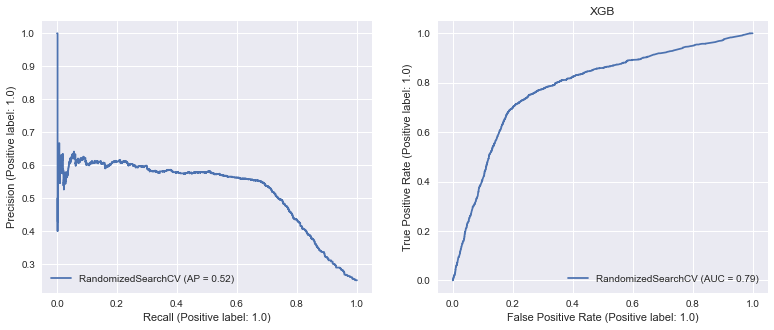

In [94]:
score_graph(random_xgb, "XGB", X_val, y_val, pred_val)

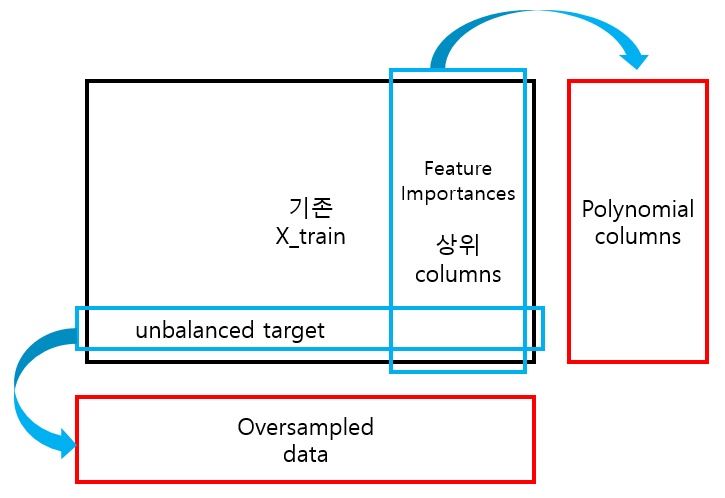

In [95]:
from IPython.display import Image
Image(r"C:\Users\inje.jeong\Desktop/발표용.PNG")

### Polynomial 컬럼 추가(Trial&Error) XGBoost모델 feature_importances_ 기준

#### 중요도 컬럼뽑기 - 랜덤서치(nopoly,no oversampling) 한번 실행후

In [96]:
imprt_lst = pd.Series(be.feature_importances_, index=X_train.columns).sort_values(ascending=False)
to_poly_lst = list(imprt_lst[imprt_lst>imprt_lst.quantile(q=0.8)].index)
to_poly_lst

['x3_unknown',
 'city_development_index',
 'x4_unknown',
 'education_level',
 'x2_major',
 'city',
 'x1_Has relevent experience',
 'x4_Pvt Ltd']

In [97]:
from sklearn.preprocessing import PolynomialFeatures

poly_f = PolynomialFeatures(degree=2, include_bias=False)
poly_f1 = PolynomialFeatures(degree=2, include_bias=False)

poly_train = poly_f.fit_transform(X.loc[:,X.columns.isin(to_poly_lst)])
poly_test = poly_f1.fit_transform(X_test.loc[:,X_test.columns.isin(to_poly_lst)])

X_train_poly_tomerge = pd.DataFrame(poly_train, columns=poly_f.get_feature_names())
X_test_poly_tomerge = pd.DataFrame(poly_test, columns=poly_f1.get_feature_names())

X_train_poly = pd.concat([X, X_train_poly_tomerge], axis=1)
X_test_poly = pd.concat([X_test, X_test_poly_tomerge], axis=1)

In [98]:
vars_poly = {f'x{i}':v for i,v in enumerate(to_poly_lst)}
vars_poly

{'x0': 'x3_unknown',
 'x1': 'city_development_index',
 'x2': 'x4_unknown',
 'x3': 'education_level',
 'x4': 'x2_major',
 'x5': 'city',
 'x6': 'x1_Has relevent experience',
 'x7': 'x4_Pvt Ltd'}

In [99]:
X_train_poly, X_val_poly, y_train_poly, y_val_poly = train_test_split(X_train_poly, y, stratify=y, shuffle=True, random_state=1)
X_train_poly.shape, X_val_poly.shape, y_train_poly.shape, y_val_poly.shape

((15965, 81), (5322, 81), (15965,), (5322,))

In [100]:
X_train_poly

,x0_Female,x0_Male,x0_Other,x1_Has relevent experience,x1_No relevent experience,x2_Arts,x2_Business Degree,x2_Humanities,x2_No Major,x2_Other,...,x4^2,x4 x5,x4 x6,x4 x7,x5^2,x5 x6,x5 x7,x6^2,x6 x7,x7^2
15870,-0.472345,0.488271,-0.10101,0.624383,-0.624383,-0.113343,-0.131898,-0.190969,-0.107904,-0.142044,...,0.466754,0.601730,-0.539430,-0.835129,0.775739,-0.695422,-1.076632,0.623421,0.965162,1.494235
15145,-0.472345,0.488271,-0.10101,-1.601582,1.601582,-0.113343,-0.131898,-0.190969,-0.107904,-0.142044,...,0.466754,0.756275,-0.506247,0.136844,1.225382,-0.820265,0.221727,0.549082,-0.148423,0.040120
9228,2.117097,-2.048044,-0.10101,-1.601582,1.601582,-0.113343,-0.131898,-0.190969,-0.107904,-0.142044,...,0.466754,-1.349399,-0.533899,0.136844,3.901154,1.543518,-0.395621,0.610704,-0.156530,0.040120
15292,-0.472345,0.488271,-0.10101,0.624383,-0.624383,-0.113343,-0.131898,-0.190969,-0.107904,-0.142044,...,0.466754,0.601730,-0.539430,0.136844,0.775739,-0.695422,0.176417,0.623421,-0.158151,0.040120
17117,-0.472345,0.488271,-0.10101,-1.601582,1.601582,-0.113343,-0.131898,-0.190969,-0.107904,-0.142044,...,0.466754,-0.383494,1.130760,0.136844,0.315086,-0.929053,-0.112434,2.739382,0.331519,0.040120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2.117097,-2.048044,-0.10101,0.624383,-0.624383,-0.113343,-0.131898,-0.190969,-0.107904,-0.142044,...,0.466754,-0.074404,-0.450943,0.136844,0.011860,0.071883,-0.021814,0.435667,-0.132209,0.040120
2221,-0.472345,0.488271,-0.10101,0.624383,-0.624383,-0.113343,-0.131898,-0.190969,-0.107904,-0.142044,...,0.466754,-0.383494,1.130760,0.136844,0.315086,-0.929053,-0.112434,2.739382,0.331519,0.040120
8027,2.117097,-2.048044,-0.10101,-1.601582,1.601582,-0.113343,-0.131898,-0.190969,-0.107904,-0.142044,...,2.142456,1.401054,-0.017317,-0.293183,0.916215,-0.011324,-0.191726,0.000140,0.002370,0.040120
7068,-0.472345,0.488271,-0.10101,-1.601582,1.601582,-0.113343,-0.131898,-0.190969,-0.107904,-0.142044,...,2.142456,0.159407,0.966125,-4.458003,0.011860,0.071883,-0.331692,0.435667,-2.010304,9.276169


#### poly-nooversampling

In [101]:
random_xgb_poly = RandomizedSearchCV(xgb,
                             param_distributions=param,
                             n_iter=10,
                             scoring='accuracy',
                             cv=3,
                             n_jobs=-1,
                             random_state=1
                             )
random_xgb_poly.fit(X_train_poly, y_train_poly)

be_poly = random_xgb_poly.best_estimator_
pd.Series(be_poly.feature_importances_, index=X_train_poly.columns).sort_values(ascending=False)

c:\users\inje.jeong\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


x2 x3                     0.303579
city_development_index    0.121432
x3_unknown                0.111596
x1 x2                     0.096234
x2 x6                     0.048728
                            ...   
x2                        0.000000
x4                        0.000000
x5                        0.000000
x6                        0.000000
x3                        0.000000
Length: 81, dtype: float32

In [102]:
pred_train_poly = random_xgb_poly.predict(X_train_poly)
pred_val_poly = random_xgb_poly.predict(X_val_poly)

print('train accuracy :', accuracy_score(y_train_poly, pred_train_poly))
print('validation accuracy :', accuracy_score(y_val_poly, pred_val_poly))

train accuracy : 0.7964923269652364
validation accuracy : 0.7854190154077415


In [103]:
show_report(random_xgb_poly, "XGB_poly", X_val_poly, y_val_poly, pred_val_poly)

,ROC-AUC,F1,precision_0,recall_0,precision_1,recall_1
XGB_poly,0.789355,0.538399,0.842282,0.878939,0.57913,0.503021


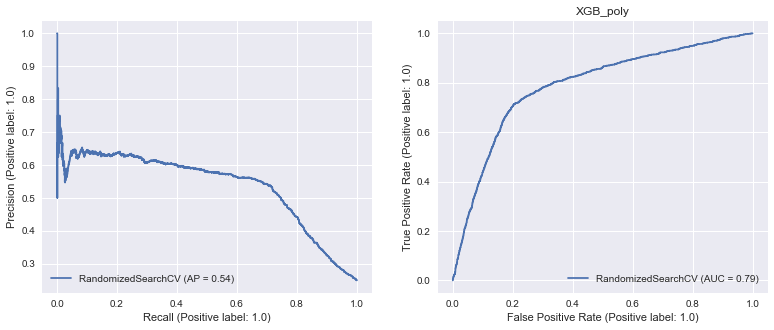

In [104]:
score_graph(random_xgb_poly, "XGB_poly", X_val_poly, y_val_poly, pred_val_poly)

### 오버샘플링

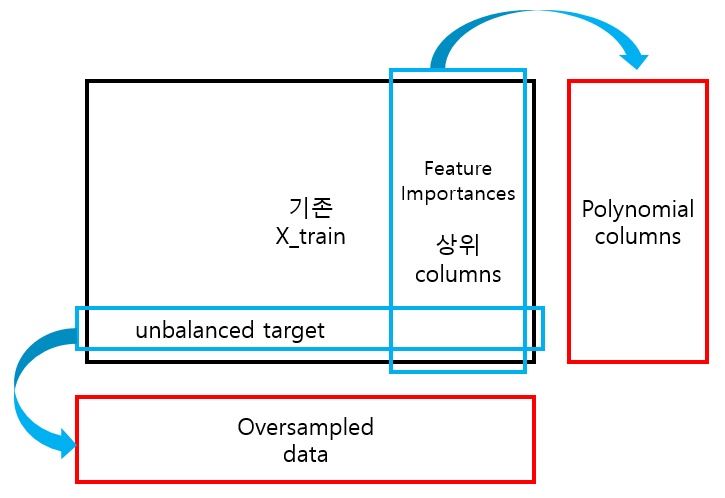

In [105]:
from IPython.display import Image
Image(r"C:\Users\inje.jeong\Desktop/발표용.PNG")

In [106]:
# from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_ovsp, y_train_ovsp = sm.fit_resample(X_train, list(y_train))

sm_poly = SMOTE(random_state=0)
X_train_poly_ovsp, y_train_poly_ovsp = sm_poly.fit_resample(X_train_poly, list(y_train_poly))

#### nopoly-oversampling

In [107]:
random_xgb_ovsp = RandomizedSearchCV(xgb,
                             param_distributions=param,
                             n_iter=10,
                             scoring='accuracy',
                             cv=3,
                             n_jobs=-1,
                             random_state=1
                             )
random_xgb_ovsp.fit(X_train_ovsp, y_train_ovsp)

be_ovsp = random_xgb_ovsp.best_estimator_
pd.Series(be_ovsp.feature_importances_, index=X_train_ovsp.columns).sort_values(ascending=False)

c:\users\inje.jeong\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:34:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


x3_unknown                    0.241468
city_development_index        0.116414
education_level               0.093454
last_new_job                  0.074847
enrolled_university           0.060705
experience                    0.058617
x4_unknown                    0.047431
x4_Pvt Ltd                    0.037618
city                          0.032196
x2_major                      0.028442
x1_Has relevent experience    0.027756
x2_STEM                       0.016432
x3_10000+                     0.014752
training_hours                0.012818
x4_Funded Startup             0.012500
x3_10/49                      0.012207
x3_5000-9999                  0.010002
x4_Other                      0.009205
x2_Humanities                 0.008652
enrollee_id                   0.008580
x4_Public Sector              0.008162
x3_500-999                    0.007578
x0_Male                       0.007494
x3_~10                        0.007174
x0_Female                     0.006848
x3_50-99                 

In [111]:
pred_train_ovsp = random_xgb_ovsp.predict(X_train_ovsp)
pred_val_ovsp = random_xgb_ovsp.predict(X_val)

print('train accuracy :', accuracy_score(y_train_ovsp, pred_train_ovsp))
print('validation accuracy :', accuracy_score(y_val, pred_val_ovsp))

train accuracy : 0.8356958225631619
validation accuracy : 0.771326568959038


#### poly-oversampleling

In [124]:
random_xgb_poly_ovsp = RandomizedSearchCV(xgb,
                             param_distributions=param,
                             n_iter=10,
                             scoring='accuracy',
                             cv=3,
                             n_jobs=-1,
                             random_state=1
                             )
random_xgb_poly_ovsp.fit(X_train_poly_ovsp, y_train_poly_ovsp)

be_poly_ovsp = random_xgb_poly_ovsp.best_estimator_
pd.Series(be_poly_ovsp.feature_importances_, index=X_train_poly_ovsp.columns).sort_values(ascending=False)

c:\users\inje.jeong\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


x2 x3                  0.237875
x6^2                   0.118414
x7^2                   0.063286
enrolled_university    0.047933
x2 x4                  0.041545
                         ...   
x2                     0.000000
x4                     0.000000
x5                     0.000000
x6                     0.000000
x3                     0.000000
Length: 81, dtype: float32

In [125]:
pred_train_poly_ovsp = random_xgb_poly_ovsp.predict(X_train_poly_ovsp)
pred_val_poly_ovsp = random_xgb_poly_ovsp.predict(X_val_poly)

print('train accuracy :', accuracy_score(y_train_poly_ovsp, pred_train_poly_ovsp))
print('validation accuracy :', accuracy_score(y_val, pred_val_poly_ovsp))

train accuracy : 0.8394480113399483
validation accuracy : 0.7829763246899661
